Hi , i make this notebook for help anyone to start...
Dont hesitate to let me know if you have any concerns about that ☺️

**Library**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,train_test_split,StratifiedShuffleSplit


In [3]:
!pip install plotly-express

Error processing line 1 of C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\vision-1.0.0-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import pickle
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
!pip install wordcloud

Error processing line 1 of C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\vision-1.0.0-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [6]:
from wordcloud import WordCloud
from IPython.display import display
import base64
import string
import re
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


**Data**

In [7]:

TRAIN_FILEPATH = "../Translated/cleaned/train.csv"
TEST_FILEPATH = "../Translated/cleaned/test.csv"
SS_FILEPATH = "../data/SampleSubmission.csv"
VECTORS_FILEPATH = ""
train_df = pd.read_csv(TRAIN_FILEPATH)
test_df = pd.read_csv(TEST_FILEPATH)
ss = pd.read_csv(SS_FILEPATH)
#train_label = pd.read_csv(DATA_PATH+"/train_label.csv")


**Analyse descriptive**

In [8]:
train_df.head()

,ID,Text,Label
0,ID_AASHwXxg,Mwangonde: Khansala wachinyamata Akamati achi...,POLITICS
1,ID_AGoFySzn,MCP siidakhutire ndi kalembera Chipani cha Ma...,POLITICS
2,ID_AGrrkBGP,Bungwe la MANEPO Lapempha Boma Liganizire Anth...,HEALTH
3,ID_AIJeigeG,Ndale zogawanitsa miyambo zanyanya Si zachile...,POLITICS
4,ID_APMprMbV,Nanga wapolisi ataphofomoka? Masiku ano sichi...,LAW/ORDER


In [10]:
train_df['Label'].unique()

array(['POLITICS', 'HEALTH', 'LAW/ORDER', 'RELIGION', 'FARMING',
       'WILDLIFE/ENVIRONMENT', 'SOCIAL ISSUES', 'SOCIAL', 'OPINION/ESSAY',
       'LOCALCHIEFS', 'WITCHCRAFT', 'ECONOMY', 'SPORTS', 'RELATIONSHIPS',
       'TRANSPORT', 'CULTURE', 'EDUCATION', 'MUSIC', 'ARTS AND CRAFTS',
       'FLOODING'], dtype=object)

In [11]:
train_df.shape

(1436, 3)

In [12]:
test_df.head()

,ID,Text
0,ID_ADHEtjTi,Abambo odzikhweza akuchuluka Kafukufuku wa ap...
1,ID_AHfJktdQ,Ambuye Ziyaye Ayamikira Aphunzitsi a Tilitonse...
2,ID_AUJIHpZr,Anatcheleza: Akundiopseza a gogo wanga Akundi...
3,ID_AUKYBbIM,Ulova wafika posauzana Adatenga digiri ya uph...
4,ID_AZnsVPEi,"Dzombe kukoma, koma Kuyambira makedzana, pant..."


**EDA**

* Distribution des classes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

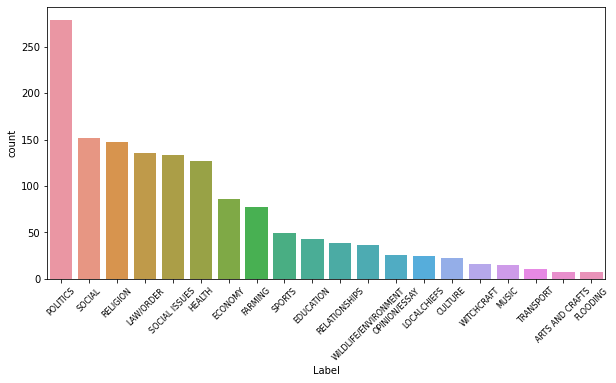

In [13]:
plt.subplots(figsize = (10,5))
sns.countplot(x = train_df['Label'],order = train_df['Label'].value_counts().index)
plt.xticks(rotation=45, fontsize=8)

In [14]:
train_df.groupby(['Label']).size()

Label
ARTS AND CRAFTS           7
CULTURE                  23
ECONOMY                  86
EDUCATION                43
FARMING                  78
FLOODING                  7
HEALTH                  127
LAW/ORDER               136
LOCALCHIEFS              25
MUSIC                    15
OPINION/ESSAY            26
POLITICS                279
RELATIONSHIPS            39
RELIGION                147
SOCIAL                  152
SOCIAL ISSUES           134
SPORTS                   49
TRANSPORT                11
WILDLIFE/ENVIRONMENT     36
WITCHCRAFT               16
dtype: int64

* Top words

In [15]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [16]:
def trace(com_word):
#common_words = get_top_n_words(bart['normalized_text_new'], 20)
        common_words_df = pd.DataFrame(com_word,columns=['word','freq'])
        plt.figure(figsize=(16, 6))
        ax = sns.barplot(x='word', y='freq', data=common_words_df,palette='hls')
        plt.title("Top of corpus", fontsize=16)
        plt.ylabel("Frequence", fontsize=14)
        plt.yticks(fontsize=13)
        plt.xticks(rotation=45, fontsize=13)
        plt.xlabel("")

In [17]:
top_unig = get_top_n_words(train_df['Text'],20)
top_big = get_top_n_bigram(train_df['Text'],20)
top_tri = get_top_n_trigram(train_df['Text'],20)

* Top 20 unigram

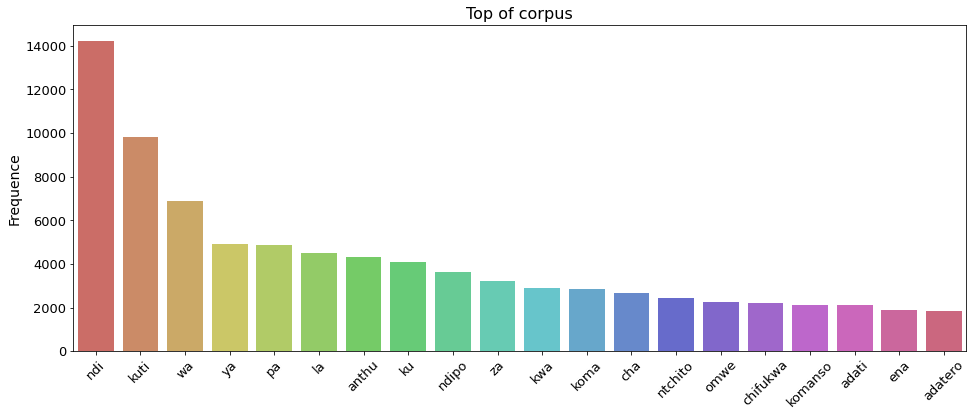

In [18]:
trace(top_unig)

* Top 20 bigram

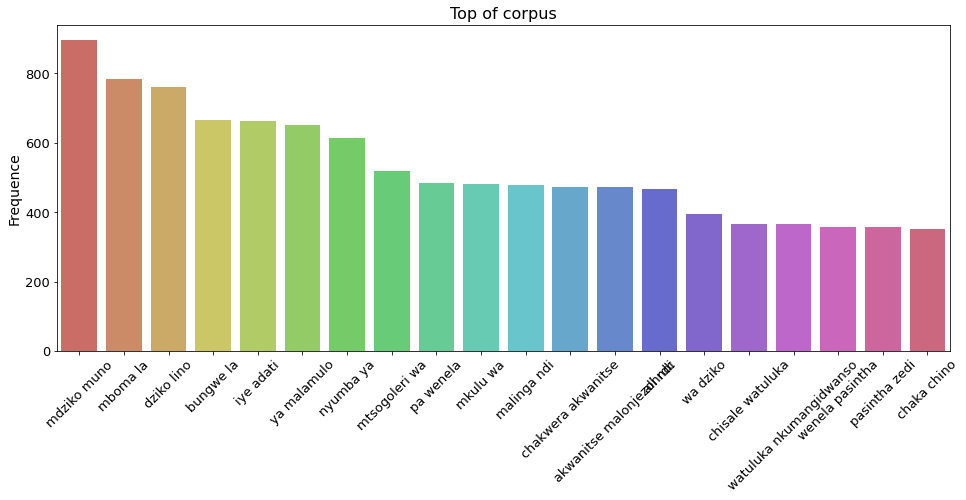

In [19]:
trace(top_big)

* Top 20 trigram

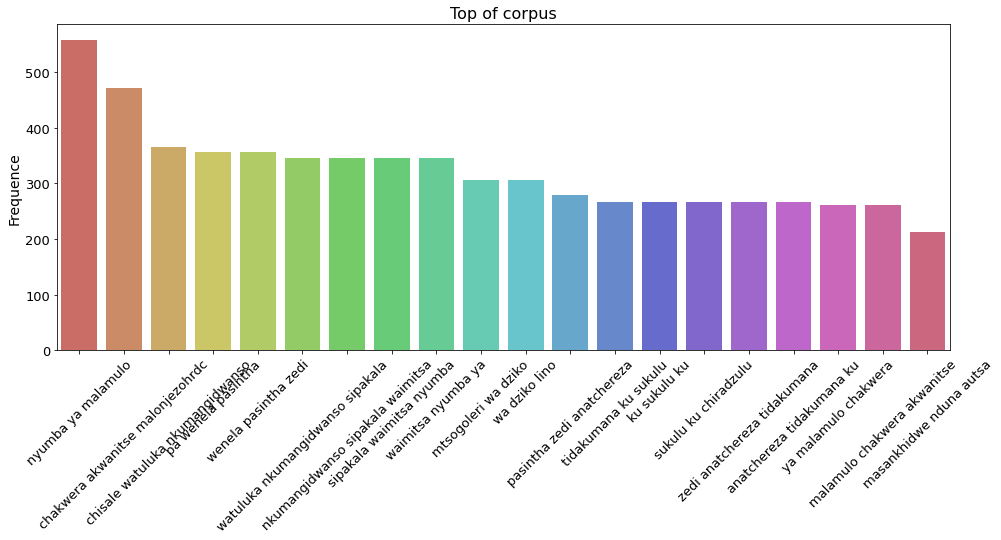

In [20]:
trace(top_tri)

* Wordcloud train set

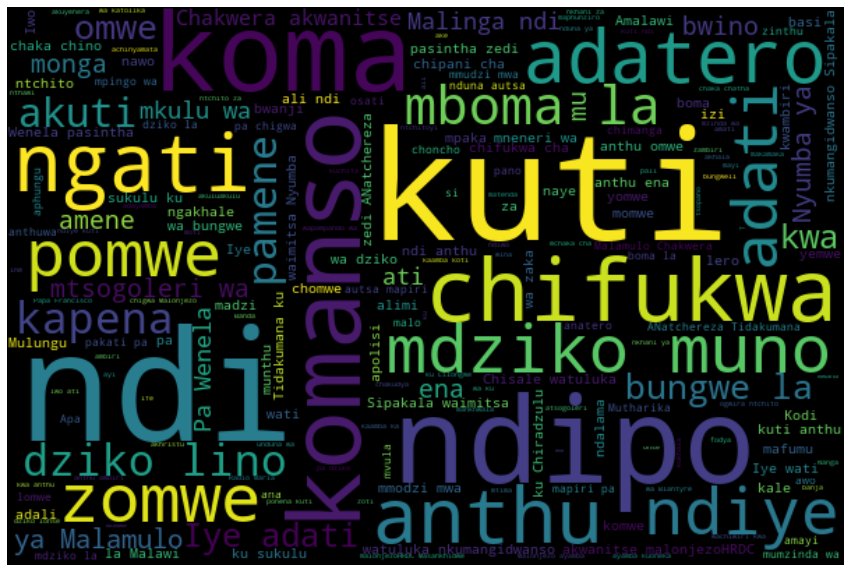

In [21]:
all_text = ' '.join( text for text in train_df['Text'])

wordcloud = WordCloud(width=600, height=400,
random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

* Wordcloud test set

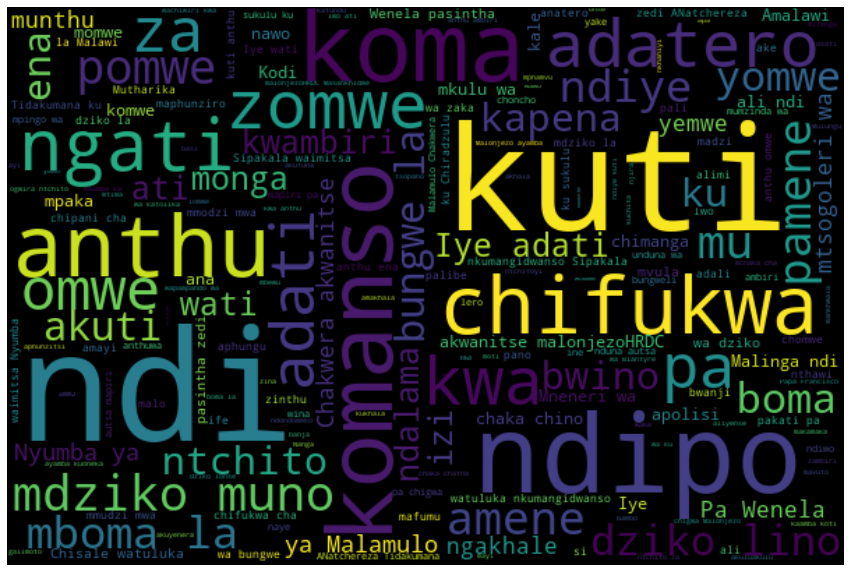

In [22]:
all_text = ' '.join( text for text in test_df['Text'])

wordcloud = WordCloud(width=600, height=400,
random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

### Basic preprocessing

> **library**

In [23]:
!pip install texthero

Error processing line 1 of C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\vision-1.0.0-py3.7-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 580, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 425, in _error_catcher
    yield
  File "C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 507, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    d

In [25]:
import texthero
from texthero import preprocessing
import nltk
import spacy

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [26]:
def preprocess(data):
    data = data.copy()
    #removing diacritics
    data['text'] = preprocessing.remove_diacritics(data['Text'])
    return data
    

In [27]:
train = preprocess(train_df)
test = preprocess(test_df)

**Encoding**

***Tf-Idf***

In [28]:
vectorizer = TfidfVectorizer().fit(train['Text'].values)
vectorizer2 = TfidfVectorizer()

In [29]:
#ngram_range=(1,2)

In [30]:
len(vectorizer.vocabulary_)

50468

* **Train_test_split**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train, train['Label'], test_size=0.1, random_state=0,stratify=train['Label'])

* **Vectorisation**

In [32]:
vectoriser2 = vectorizer2.fit(X_train['Text'].values)
X_train = vectorizer2.transform(X_train['Text'].values)
X_test = vectorizer2.transform(X_test['Text'].values)


In [33]:
All_X_train = vectorizer.transform(train['Text'].values)
All_X_test = vectorizer.transform(test['Text'].values)

* **Evaluation**

In [34]:
def Scorer(y_true,y_pred):
    from sklearn.metrics import classification_report
    print(classification_report(y_true,y_pred,digits=4))

In [35]:
from sklearn import svm

In [36]:
model = svm.SVC()
model.fit(X_train, y_train)

SVC()

In [37]:
import gc 
gc.collect()

100

In [38]:
pred = model.predict(X_test)

In [39]:
Scorer(y_test,pred)

                      precision    recall  f1-score   support

     ARTS AND CRAFTS     0.0000    0.0000    0.0000         1
             CULTURE     0.0000    0.0000    0.0000         2
             ECONOMY     0.0000    0.0000    0.0000         9
           EDUCATION     0.0000    0.0000    0.0000         4
             FARMING     0.8750    0.8750    0.8750         8
            FLOODING     0.0000    0.0000    0.0000         1
              HEALTH     0.8000    0.6154    0.6957        13
           LAW/ORDER     0.5625    0.6429    0.6000        14
         LOCALCHIEFS     0.0000    0.0000    0.0000         2
               MUSIC     0.0000    0.0000    0.0000         1
       OPINION/ESSAY     0.0000    0.0000    0.0000         3
            POLITICS     0.5200    0.9286    0.6667        28
       RELATIONSHIPS     1.0000    0.7500    0.8571         4
            RELIGION     0.9231    0.8000    0.8571        15
              SOCIAL     0.5500    0.7333    0.6286        15
       

C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [44]:
clf2 = svm.SVC(C=5)
model = clf2.fit(All_X_train,train['Label'].ravel())
pred_2 = model.predict(All_X_train)

In [46]:
Scorer(train['Label'],pred_2)

                      precision    recall  f1-score   support

     ARTS AND CRAFTS     1.0000    1.0000    1.0000         7
             CULTURE     0.9565    0.9565    0.9565        23
             ECONOMY     1.0000    0.9884    0.9942        86
           EDUCATION     1.0000    1.0000    1.0000        43
             FARMING     1.0000    1.0000    1.0000        78
            FLOODING     1.0000    1.0000    1.0000         7
              HEALTH     0.9922    1.0000    0.9961       127
           LAW/ORDER     1.0000    1.0000    1.0000       136
         LOCALCHIEFS     1.0000    1.0000    1.0000        25
               MUSIC     1.0000    1.0000    1.0000        15
       OPINION/ESSAY     1.0000    1.0000    1.0000        26
            POLITICS     0.9964    1.0000    0.9982       279
       RELATIONSHIPS     1.0000    1.0000    1.0000        39
            RELIGION     1.0000    1.0000    1.0000       147
              SOCIAL     1.0000    1.0000    1.0000       152
       

*Predict test*

In [41]:
pred = model.predict(All_X_test)

In [48]:
test_df

,ID,Text
0,ID_ADHEtjTi,Abambo odzikhweza akuchuluka Kafukufuku wa ap...
1,ID_AHfJktdQ,Ambuye Ziyaye Ayamikira Aphunzitsi a Tilitonse...
2,ID_AUJIHpZr,Anatcheleza: Akundiopseza a gogo wanga Akundi...
3,ID_AUKYBbIM,Ulova wafika posauzana Adatenga digiri ya uph...
4,ID_AZnsVPEi,"Dzombe kukoma, koma Kuyambira makedzana, pant..."
...,...,...
615,ID_zdpOUWyJ,Kanyongolo Wapempha Oyimira Milandu Kuti Atsat...
616,ID_zhnOomuu,"Amandimenya\nZikomo gogo,\nNdine mtsikana wa z..."
617,ID_zmWHvBJb,Apolisi athotha gulu la MYP Asilikali 56 a gu...
618,ID_zphjdFIb,Mwambo wa ukwati wa Chitonga Mtundu wina uliw...


**File Generator**

In [49]:
test_df['Label'] = pred
submit = test_df[["ID","Label"]]
submit.to_csv("baseline.csv", index=False)


In [50]:
submit

,ID,Label
0,ID_ADHEtjTi,SOCIAL ISSUES
1,ID_AHfJktdQ,RELIGION
2,ID_AUJIHpZr,RELATIONSHIPS
3,ID_AUKYBbIM,POLITICS
4,ID_AZnsVPEi,SOCIAL ISSUES
...,...,...
615,ID_zdpOUWyJ,LAW/ORDER
616,ID_zhnOomuu,RELATIONSHIPS
617,ID_zmWHvBJb,LAW/ORDER
618,ID_zphjdFIb,SOCIAL ISSUES
